
### Census Income Data Set



#### Data Set Information:

Extraction was done by Barry Becker from the 1994 Census database. A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))

Prediction task is to determine whether a person makes over 50K a year.

Attribute Information:

Listing of attributes:

>50K, <=50K.

age: continuous.
workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
fnlwgt: Final weight - continuous.
education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
education-num: continuous.
marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
sex: Female, Male.
capital-gain: continuous.
capital-loss: continuous.
hours-per-week: continuous.
native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.


Since, the target is to find out whether an employee makes >50K per year, the target has two classes '<50K' and '>50K'. 
And the problem is classification.




In [171]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [172]:
#importing the dataset
df=pd.read_csv("census.csv",header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [173]:
df.columns=['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','salary_range']

In [174]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary_range
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
#Checking the shape of the data
df.shape
#There are 5425 rows and 15 columns in the dataset

(5425, 15)

In [6]:
#check the datatypes of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5425 entries, 0 to 5424
Data columns (total 15 columns):
age               5425 non-null int64
workclass         5425 non-null object
fnlwgt            5425 non-null int64
education         5425 non-null object
education-num     5425 non-null int64
marital-status    5425 non-null object
occupation        5425 non-null object
relationship      5425 non-null object
race              5425 non-null object
sex               5425 non-null object
capital-gain      5425 non-null int64
capital-loss      5425 non-null int64
hours-per-week    5425 non-null int64
native-country    5425 non-null object
salary_range      5424 non-null object
dtypes: int64(6), object(9)
memory usage: 635.9+ KB


Checking for missing values

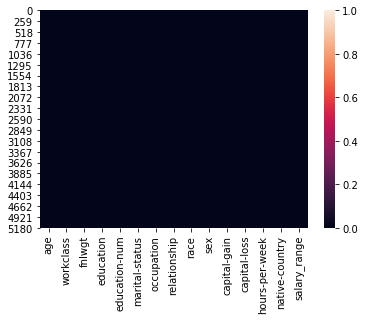

In [7]:
sns.heatmap(df.isnull())

In [8]:
df.isnull().sum()
#There is one missing value in the salary range column

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary_range      1
dtype: int64

#### Univariate Analysis

In [9]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary_range'],
      dtype='object')

In [10]:
#Let's check the unique values and its count in the columns
for i in df.columns:
    print("The unique values and its count in column", i, "are")
    print(df[i].value_counts())
    print("\n")

The unique values and its count in column age are
31    171
25    155
35    151
23    149
34    147
     ... 
79      3
78      2
88      1
82      1
83      1
Name: age, Length: 69, dtype: int64


The unique values and its count in column workclass are
 Private             3716
 Self-emp-not-inc     423
 Local-gov            358
 ?                    354
 State-gov            215
 Self-emp-inc         196
 Federal-gov          161
 Without-pay            1
 Never-worked           1
Name: workclass, dtype: int64


The unique values and its count in column fnlwgt are
123983    5
163003    4
111567    4
117963    4
116632    4
         ..
160118    1
204057    1
88265     1
163101    1
98837     1
Name: fnlwgt, Length: 4956, dtype: int64


The unique values and its count in column education are
 HS-grad         1749
 Some-college    1224
 Bachelors        899
 Masters          278
 Assoc-voc        239
 11th             211
 Assoc-acdm       177
 10th             152
 7th-8th          11

Observations
1. 4110 are below 50K salary and 1314 are above 50K salary.
2. There are missing values represented by '?' in columns native country, occupation and workclass.


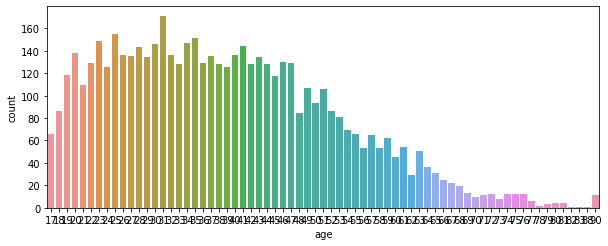

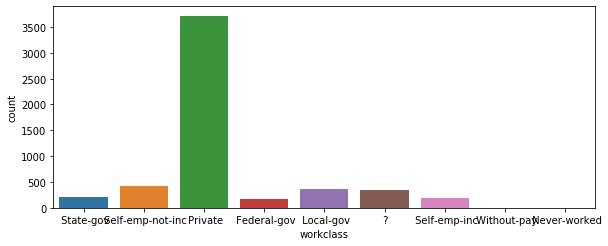

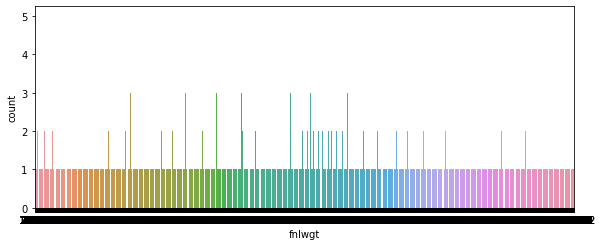

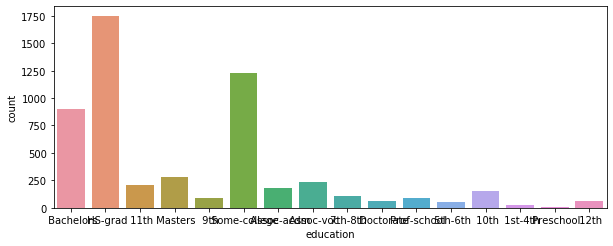

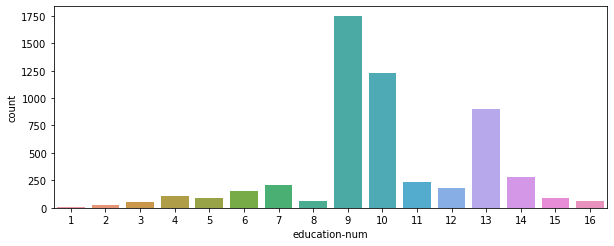

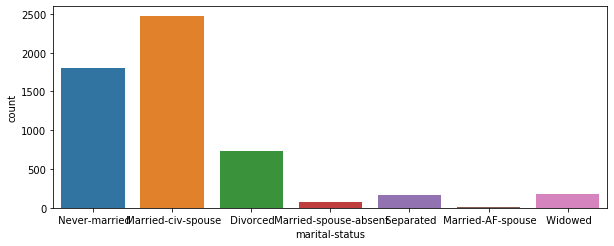

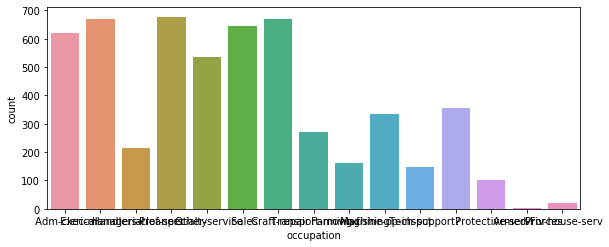

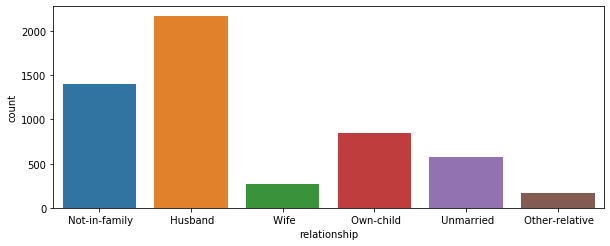

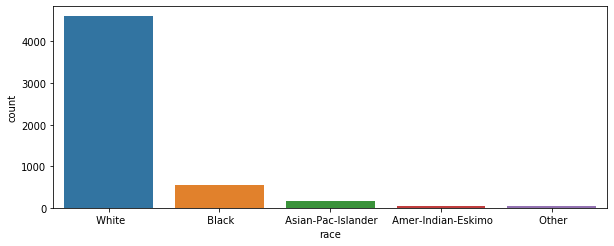

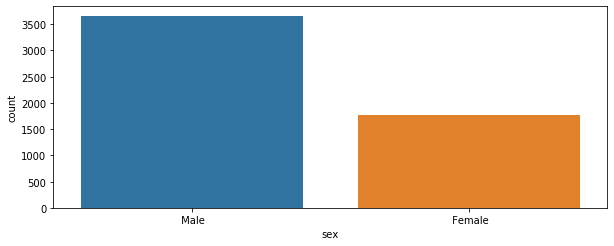

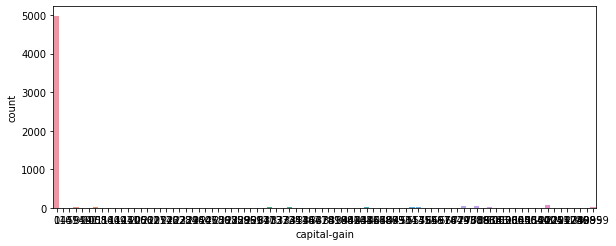

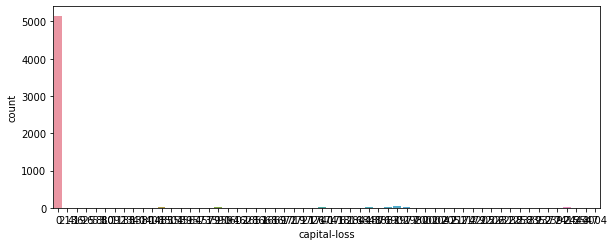

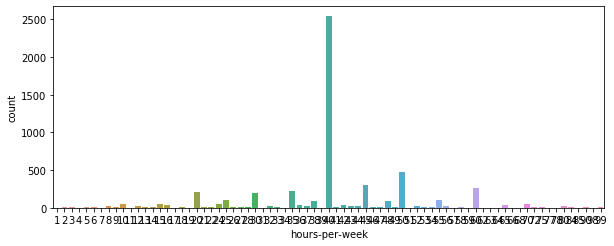

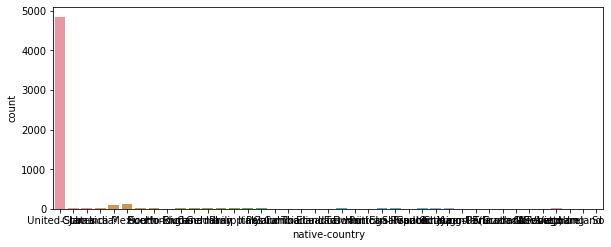

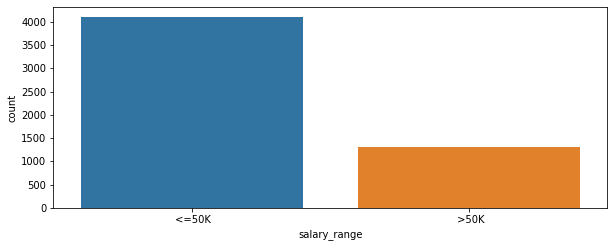

In [35]:
for i in df.columns:
    if df.columns.dtype=='O':
        plt.figure(figsize=(40,20))
        plt.subplot(651)
        sns.countplot(df[i])
        plt.tight_layout()

Observations:
1. Number of male employees are around 3500 and no of female employees are around 1600.
2. Number of white workers are more when compared to others. They are the major employees followed by Black and Asians.
3. Since there are more male employees, in the status of relationship, many are husbands, followed by not in family.
4. Many employees are married and staying with spouse, followed by never married and divorced.
5. People are more employed in private sector.

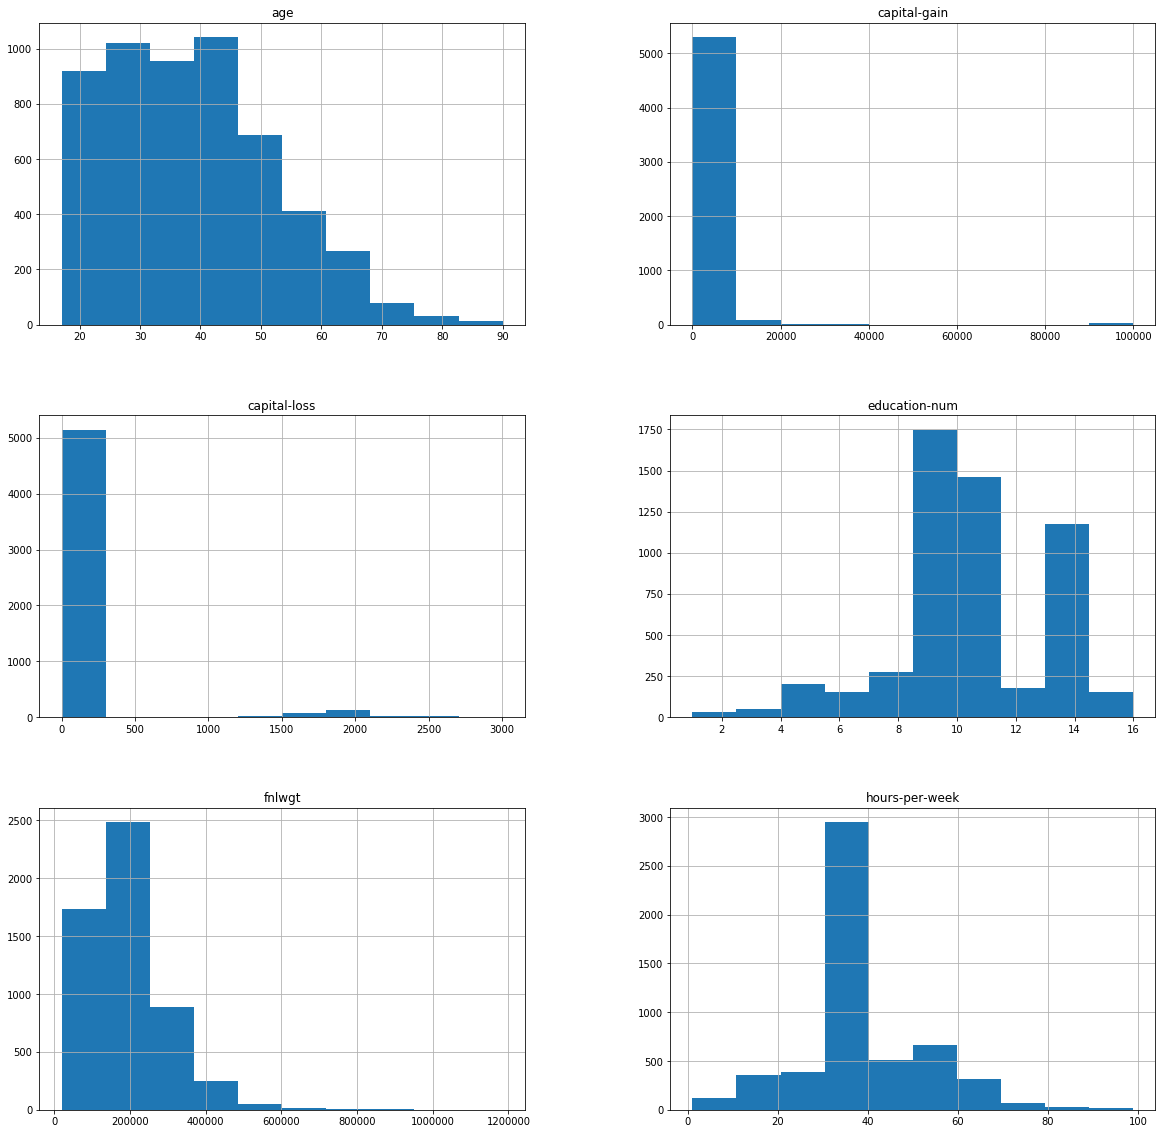

In [64]:
#checking the distribution plots of the columns
df.hist(figsize=(20,20))
plt.show()

Observations
1. Around 25 to 45 constitute the majority of workforce.
2. Columns are mostly skewed which needs to be treated later.

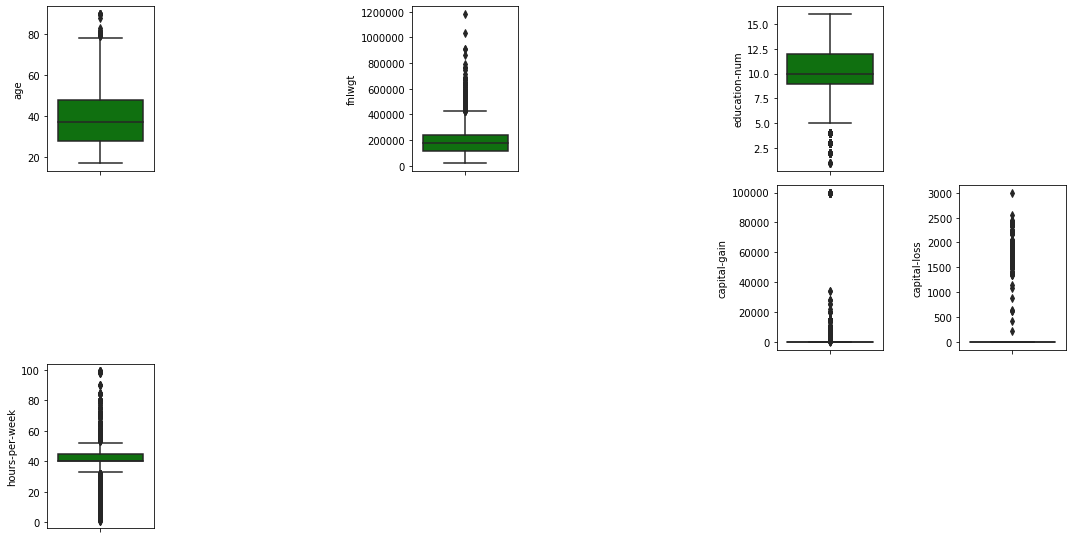

In [61]:
#checking the box plots of the columns

col_list=df.columns.values
plt.figure(figsize=(15,15))
for i in range (0,len(col_list)):
    if df[col_list[i]].dtype!='O':
        plt.subplot(6,6,i+1)
        sns.boxplot(df[col_list[i]], color='green',orient='v')
        plt.tight_layout()

In [ ]:
#There are outliers in the columns which needs to treated later.

#### Statistical Analysis

In [65]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,5425.000000,5.425000e+03,5425.000000,5425.000000,5425.000000,5425.000000
mean,38.594839,1.905781e+05,10.077051,1023.957788,94.495115,40.460645
std,13.684979,1.066940e+05,2.542406,7063.164322,413.244944,12.104235
min,17.000000,1.930200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.179830e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.793520e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.408170e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.184622e+06,16.000000,99999.000000,3004.000000,99.000000


Observations:
1. The average working hours per week is 40.
2. The average age of employees is 38. This seems to have outliers at age 90.

#### Bivariate Analysis

In [12]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary_range'],
      dtype='object')

In [13]:
df.groupby("workclass").mean()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
workclass,,,,,,
?,39.245763,190661.516949,9.248588,364.299435,39.389831,31.522599
Federal-gov,42.434783,189270.397516,10.726708,605.223602,144.142857,42.000000
Local-gov,41.804469,187586.539106,10.765363,636.983240,153.201117,40.779330
Never-worked,18.000000,206359.000000,6.000000,0.000000,0.000000,40.000000
Private,36.938105,193057.888859,9.905813,846.501884,87.888052,40.545210
Self-emp-inc,45.357143,173067.576531,11.158163,5548.158163,182.627551,49.510204
Self-emp-not-inc,45.120567,184936.420804,10.245863,1779.739953,106.319149,43.340426
State-gov,38.906977,181292.609302,11.497674,533.293023,61.762791,38.074419
Without-pay,65.000000,27012.000000,4.000000,0.000000,0.000000,50.000000


Observations
1. The highest average education number is recorded in state government category followed by self emp -inc. The least is recorded in without pay, followed by never worked.
2. The highest capital gain is recorded in self emp inc followed by self emp not inc.
3. The highest no. of hours per week is dedicated by those who are working without pay. However the count under this category is just 1 and thus cannot be generalised. This is followed by self emp inc and self employment not inc. This shows insight of pyschology of work class where there dedicate more time for own establishments.

In [14]:
df.groupby("sex").mean()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
sex,,,,,,
Female,37.180532,185548.461800,10.044143,618.155631,58.311262,36.446520
Male,39.278021,193007.738655,10.092947,1219.980864,111.973756,42.399672


Observations
1. Male class contribute more towards capital gain and capital loss. The no. of hours dedicated by men is more than women. The average age of employees female is 37 whereas male is 39.

In [15]:
df.groupby('education').mean()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
education,,,,,,
10th,39.256579,209325.677632,6.0,320.328947,35.190789,38.289474
11th,32.568720,200001.170616,7.0,243.867299,46.180095,35.327014
12th,30.803279,200717.360656,8.0,85.967213,28.540984,35.000000
1st-4th,48.166667,278077.500000,2.0,0.000000,0.000000,36.500000
5th-6th,41.122449,230861.918367,3.0,132.591837,166.979592,40.142857
7th-8th,47.090090,204581.567568,4.0,163.972973,54.666667,37.738739
9th,42.359551,213696.067416,5.0,367.325843,56.674157,37.314607
Assoc-acdm,36.361582,182750.073446,12.0,993.214689,71.559322,40.892655
Assoc-voc,38.857741,173894.184100,11.0,537.368201,93.000000,40.736402


Observations:
1. The average hours per week dedicated by prof-school is highest at 48.8 followed by Doctorate at 46 and Masters at 44.
2. The capital gain of Prof school is highest at 13440 followed by Doctorate at 3819 and Masters at 1510.
3. The education-num is allotted as per the education starting at 1 for Preschool to 16 for Prof-school. The allotment basis is easily interpretable here.

In [26]:
df.groupby('race').mean()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
race,,,,,,
Amer-Indian-Eskimo,37.129630,119403.444444,9.111111,410.277778,0.000000,40.703704
Asian-Pac-Islander,36.658537,156907.341463,11.195122,1597.018293,122.762195,40.530488
Black,38.462094,229144.064982,9.453069,411.824910,47.265343,38.122744
Other,33.555556,186765.166667,8.777778,0.000000,165.222222,41.027778
White,38.735976,188008.770197,10.133637,1092.214425,99.711934,40.731427


Observations:
1. The average education num of Asian Pacific Islander group is highest at 11.19 followed by white. Similary the capital gain is highest at 1597 followed by white at 1092.
2. Average lowest education num is amongst other race followed by Amer-Indian_eskimo race and later by black.

In [16]:
df.groupby('salary_range').mean()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
salary_range,,,,,,
<=50K,36.796107,192153.303406,9.622871,154.169586,57.826764,38.850365
>50K,44.226027,185679.821157,11.495434,3745.307458,209.260274,45.497717


Observations:
1. The average education num of salary range >50K is 11.49 where as for <50K it is 9.62. This shows that education has influence on the salary range.
2. The capital gain of salary range >50K is high at 3745 and for <50K it is 154. Similarly capital loss is higher for >50k range when compared to <50k.
3. The average hours dedicated per week by >50K is 45.5 whereas the average hours dedicated by <50K is 38.85.

#### Checking correlation

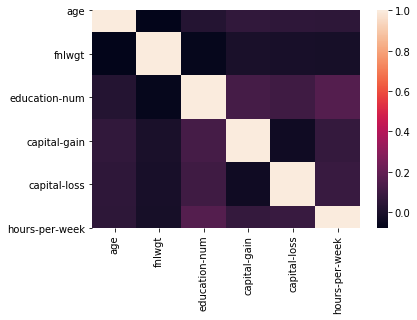

In [17]:
sns.heatmap(df.corr())

In [18]:
df.corr()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.077976,0.024414,0.061732,0.056186,0.049497
fnlwgt,-0.077976,1.000000,-0.061145,-0.004586,-0.009092,-0.012987
education-num,0.024414,-0.061145,1.000000,0.117637,0.098901,0.159501
capital-gain,0.061732,-0.004586,0.117637,1.000000,-0.033156,0.073428
capital-loss,0.056186,-0.009092,0.098901,-0.033156,1.000000,0.083918
hours-per-week,0.049497,-0.012987,0.159501,0.073428,0.083918,1.000000


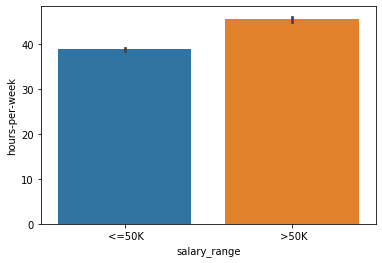

In [29]:
sns.barplot(x='salary_range',y='hours-per-week',data=df)

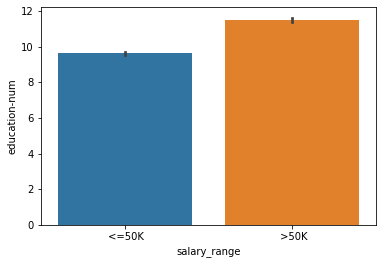

In [27]:
sns.barplot(x='salary_range',y='education-num',data=df)

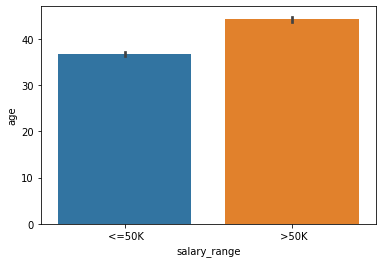

In [28]:
sns.barplot(x='salary_range',y='age',data=df)

Observations on barplots:
1. The above barplots shows the positive influence of age, education number and hours per week on the salary range.


#### Handling missing data

In [32]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary_range'],
      dtype='object')

In [176]:
#native country, occupation and workclass
print(df['occupation'].value_counts())
print()
print(df['workclass'].value_counts())
print()
print(df['native-country'].value_counts())

 Prof-specialty       677
 Exec-managerial      669
 Craft-repair         669
 Sales                646
 Adm-clerical         619
 Other-service        536
 Unknown              355
 Machine-op-inspct    336
 Transport-moving     271
 Handlers-cleaners    216
 Farming-fishing      160
 Tech-support         147
 Protective-serv      103
 Priv-house-serv       19
 Armed-Forces           2
Name: occupation, dtype: int64

 Private             3716
 Self-emp-not-inc     423
 Local-gov            358
 Unknown              354
 State-gov            215
 Self-emp-inc         196
 Federal-gov          161
 Without-pay            1
 Never-worked           1
Name: workclass, dtype: int64

 United-States                 4951
 Mexico                         113
 Canada                          32
 Germany                         25
 Philippines                     22
 Cuba                            18
 Puerto-Rico                     18
 El-Salvador                     17
 England                 

Observations:
1. If we observe, the no. of values missing in occupation and work class are almost similar 355 and 354. Hence, instead of replacing them with other values in the columns, let us retain them as it is.
2. The no. of countries missing can be replaced with the most occuring country ie. USA.
3. There is one null value in the salary range which can be replaced with most occuring value.



In [175]:
#replacing '?' values with relevant values
df['workclass']=df['workclass'].str.replace('?','Unknown')
df['occupation']=df['occupation'].str.replace('?','Unknown')
df['native-country']=df['native-country'].str.replace('?','United-States')

In [177]:
#replacing the null values in salary range with most occuring value
df['salary_range']=df['salary_range'].replace(np.nan,'<50K')

In [178]:
print(df['occupation'].value_counts())
print()
print(df['workclass'].value_counts())
print()
print(df['native-country'].value_counts())

 Prof-specialty       677
 Exec-managerial      669
 Craft-repair         669
 Sales                646
 Adm-clerical         619
 Other-service        536
 Unknown              355
 Machine-op-inspct    336
 Transport-moving     271
 Handlers-cleaners    216
 Farming-fishing      160
 Tech-support         147
 Protective-serv      103
 Priv-house-serv       19
 Armed-Forces           2
Name: occupation, dtype: int64

 Private             3716
 Self-emp-not-inc     423
 Local-gov            358
 Unknown              354
 State-gov            215
 Self-emp-inc         196
 Federal-gov          161
 Without-pay            1
 Never-worked           1
Name: workclass, dtype: int64

 United-States                 4951
 Mexico                         113
 Canada                          32
 Germany                         25
 Philippines                     22
 Cuba                            18
 Puerto-Rico                     18
 El-Salvador                     17
 England                 

#### Using Labelencoder
We need to convert the categorical data to numerical data in order to fit the model 

In [179]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
for i in df.columns:
    if df.columns.dtype=='O':
        df[i]=lb.fit_transform(df[i])


In [180]:
#Checking if the columns have been changed from categorical type
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary_range
0,22,6,625,9,12,4,0,1,4,1,16,0,37,37,0
1,33,5,685,9,12,2,3,0,4,1,0,0,12,37,0
2,21,3,3326,11,8,0,5,1,4,1,0,0,37,37,0
3,36,3,3594,1,6,2,5,0,2,1,0,0,37,37,0
4,11,3,4474,9,12,2,9,5,2,0,0,0,37,4,0


#### removing the outliers

In [181]:
from scipy.stats import zscore
z=np.abs(zscore(df))
print("The shape of the dataframe before removing outliers is", df.shape)
df=df[(z<3).all(axis=1)]
print("The shape of the dataframe after removing outliers is", df.shape)

The shape of the dataframe before removing outliers is (5425, 15)
The shape of the dataframe after removing outliers is (4508, 15)


In [182]:
#separating the input and output variables 
x=df.iloc[:,0:-1]
y=pd.DataFrame(df.iloc[:,-1])
x.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,22,6,625,9,12,4,0,1,4,1,16,0,37,37
1,33,5,685,9,12,2,3,0,4,1,0,0,12,37
2,21,3,3326,11,8,0,5,1,4,1,0,0,37,37
3,36,3,3594,1,6,2,5,0,2,1,0,0,37,37
5,20,3,4110,12,13,2,3,5,4,0,0,0,37,37


In [187]:
y.head()

,salary_range
0,0
1,0
2,0
3,0
5,0


#### checking the skewness

In [188]:
x.skew()

age               0.514691
workclass         0.736331
fnlwgt           -0.003431
education        -0.949164
education-num    -0.168218
marital-status   -0.100442
occupation        0.109615
relationship      0.715423
race             -2.391889
sex              -0.690113
capital-gain      6.562771
capital-loss      9.356373
hours-per-week   -0.140705
native-country   -4.999286
dtype: float64

In [189]:
#using the log function to remove the skewness
for i in x.columns:
    if x.skew()[i]>0.55:
        x[i]=np.log1p(x[i])

In [190]:
#checking skewness again
x.skew()

age               0.514691
workclass        -1.344246
fnlwgt           -0.003431
education        -0.949164
education-num    -0.168218
marital-status   -0.100442
occupation        0.109615
relationship      0.201998
race             -2.391889
sex              -0.690113
capital-gain      5.556087
capital-loss      8.276082
hours-per-week   -0.140705
native-country   -4.999286
dtype: float64

In [191]:
#using the sqrt function to remove the skewness
for i in x.columns:
    if x.skew()[i]>0.55:
        x[i]=np.sqrt(x[i])

In [192]:
#checking skewness again
x.skew()
#skewness has been reduced to some extent

age               0.514691
workclass        -1.344246
fnlwgt           -0.003431
education        -0.949164
education-num    -0.168218
marital-status   -0.100442
occupation        0.109615
relationship      0.201998
race             -2.391889
sex              -0.690113
capital-gain      5.323911
capital-loss      8.071394
hours-per-week   -0.140705
native-country   -4.999286
dtype: float64

#### Scaling the data

In [193]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x=pd.DataFrame(scaler.fit_transform(x))
x.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.354839,0.935785,0.126135,0.600000,0.769231,0.666667,0.000000,0.386853,1.0,1.0,0.84475,0.0,0.492308,0.909091
1,0.532258,0.861654,0.138244,0.600000,0.769231,0.333333,0.214286,0.000000,1.0,1.0,0.00000,0.0,0.107692,0.909091
2,0.338710,0.666667,0.671241,0.733333,0.461538,0.000000,0.357143,0.386853,1.0,1.0,0.00000,0.0,0.492308,0.909091
3,0.580645,0.666667,0.725328,0.066667,0.307692,0.333333,0.357143,0.000000,0.0,1.0,0.00000,0.0,0.492308,0.909091
4,0.322581,0.666667,0.829465,0.800000,0.846154,0.333333,0.214286,1.000000,1.0,0.0,0.00000,0.0,0.492308,0.909091


#### Finding the best random state for the algorithm

In [194]:
#import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def max_accuracy(reg,x,y):
    max_acc_score=0
    for r_state in range(42,101):
        train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=r_state,test_size=0.20)
        reg.fit(train_x,train_y)
        pred=reg.predict(test_x)
        acc_score=accuracy_score(test_y,pred)
        print("The accuracy score achieved at r state", r_state, "is", acc_score)
        if acc_score>max_acc_score:
            max_acc_score=acc_score
            final_r_state=r_state
    print("The maximum accuracy", max_acc_score, "is achieved at random state", final_r_state)
    return max_acc_score

In [195]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
max_accuracy(lg,x,y)

The accuracy score achieved at r state 42 is 0.8148558758314856
The accuracy score achieved at r state 43 is 0.8414634146341463
The accuracy score achieved at r state 44 is 0.8458980044345898
The accuracy score achieved at r state 45 is 0.8281596452328159
The accuracy score achieved at r state 46 is 0.8458980044345898
The accuracy score achieved at r state 47 is 0.8403547671840355
The accuracy score achieved at r state 48 is 0.8292682926829268
The accuracy score achieved at r state 49 is 0.8292682926829268
The accuracy score achieved at r state 50 is 0.8070953436807096
The accuracy score achieved at r state 51 is 0.8237250554323725
The accuracy score achieved at r state 52 is 0.8203991130820399
The accuracy score achieved at r state 53 is 0.8248337028824834
The accuracy score achieved at r state 54 is 0.8403547671840355
The accuracy score achieved at r state 55 is 0.8226164079822617
The accuracy score achieved at r state 56 is 0.843680709534368
The accuracy score achieved at r state 57

0.8580931263858093

In [197]:
#checking the cross val score
score=cross_val_score(lg,x,y,cv=5).mean()
print("The cross val score is", round(score,2))

The cross val score is 0.83


In [198]:
#Finalising the train test data
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=59,test_size=0.20)

In [200]:
#Let us use the other classification models and for the same let us use GridSearchCV to bring out the best parameters
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
parameters={'criterion':('gini','entropy'), 'splitter':('best','random')}
gddt=GridSearchCV(dt,parameters)
gddt.fit(train_x,train_y)
gddt.best_params_

{'criterion': 'entropy', 'splitter': 'random'}

In [201]:
from sklearn.svm import SVC
sv=SVC()
parameters={'C':(1,10),'kernel':('linear','poly','rbf')}
gdsv=GridSearchCV(sv,parameters)
gdsv.fit(train_x,train_y)
gdsv.best_params_

{'C': 10, 'kernel': 'rbf'}

In [202]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier()
parameters={'n_neighbors':(5,10,15,20),'weights':('uniform','distance'),'algorithm':('auto','ball_tree','kd_tree','brute')}
gdkn=GridSearchCV(kn,parameters)
gdkn.fit(train_x,train_y)
gdkn.best_params_

{'algorithm': 'auto', 'n_neighbors': 20, 'weights': 'uniform'}

In [206]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
parameters={'penalty':('l1','l2')}
gd=GridSearchCV(lg,parameters)
gd.fit(train_x,train_y)
gd.best_params_

{'penalty': 'l1'}

In [207]:
#After obtaining best parameters, we should now check the models

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

The accuracy score is  0.8536585365853658

The cross val score is 0.8287548561774652

              precision    recall  f1-score   support

           0       0.88      0.95      0.91       747
           1       0.62      0.39      0.48       155

    accuracy                           0.85       902
   macro avg       0.75      0.67      0.70       902
weighted avg       0.84      0.85      0.84       902


[[709  38]
 [ 94  61]]

roc_auc_score 0.6713391199205424


AxesSubplot(0.125,0.808774;0.62x0.0712264)




KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=20, p=2,
      

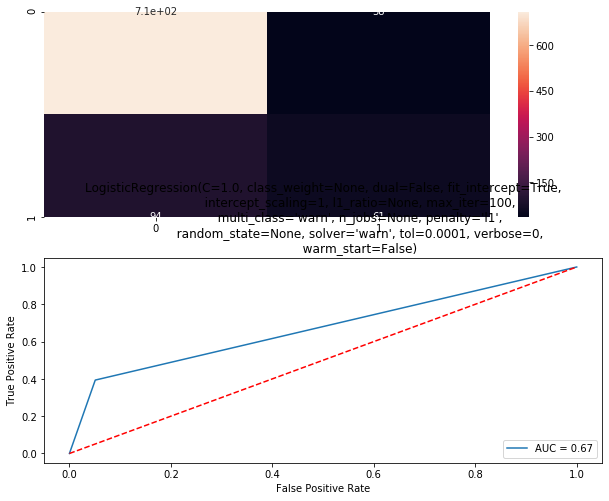

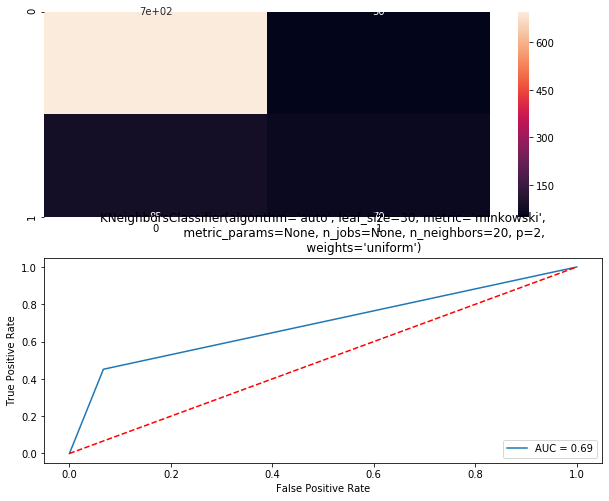

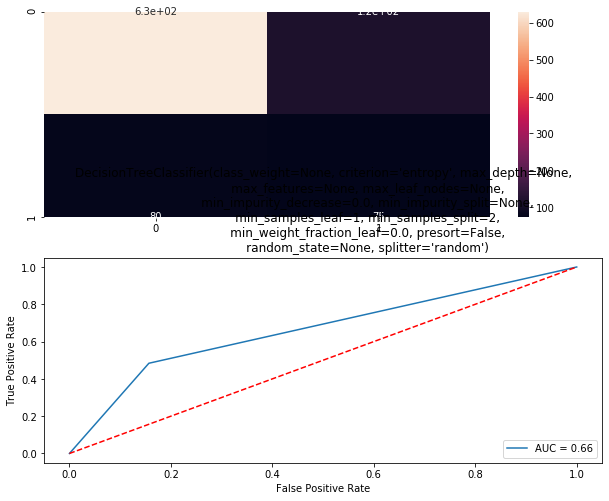

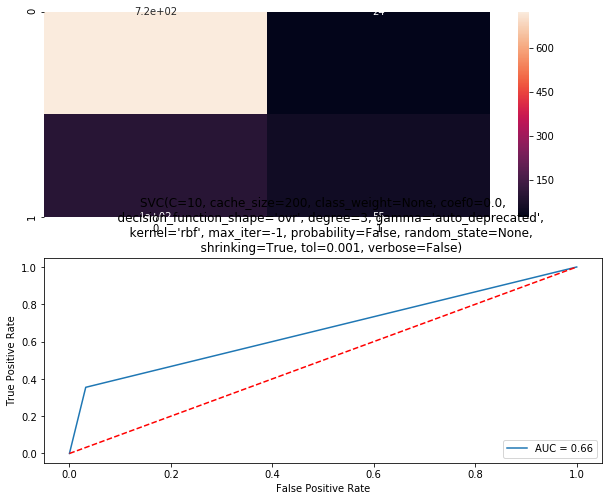

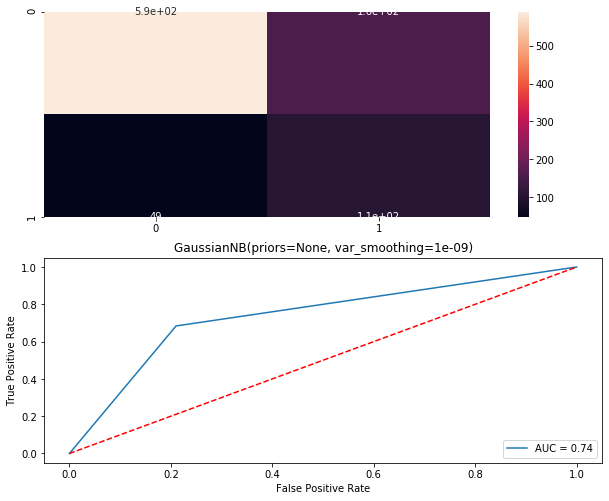

In [208]:
score=[]
cv=[]
rocscore=[]

from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression

algorithms=[LogisticRegression(penalty='l1'),KNeighborsClassifier(algorithm='auto', n_neighbors= 20, weights='uniform'), DecisionTreeClassifier(criterion= 'entropy', splitter= 'random'), SVC(C=10, kernel='rbf'),GaussianNB()]

for i in algorithms:
    print(i)
    i.fit(train_x,train_y)
    pred=i.predict(test_x)
    accscore=accuracy_score(test_y,pred)
    score.append(accscore)
    print("")
    print("The accuracy score is ", accscore)
    print("")
    cvscore=cross_val_score(i,x,y,cv=5,scoring='accuracy').mean()
    cv.append(cvscore)
    print("The cross val score is", cvscore)
    print()
    print(classification_report(test_y,pred))
    print()
    cm=confusion_matrix(test_y,pred)
    print(cm)
    print()
    false_positive_rate,true_positive_rate,thresholds=roc_curve(test_y,pred)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    print('roc_auc_score',roc_auc)
    rocscore.append(roc_auc)
    print("\n")
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(i)
    plt.plot(false_positive_rate,true_positive_rate,label='AUC = %0.2f'%roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print("\n")
    print("\n")

In [209]:
result=pd.DataFrame({'Model':[LogisticRegression,KNeighborsClassifier, DecisionTreeClassifier, SVC,GaussianNB],'Accuracy_Score':score,'Cross_val_score':cv, 'AUC_ROC':rocscore})
result

,Model,Accuracy_Score,Cross_val_score,AUC_ROC
0,<class 'sklearn.linear_model.logistic.Logistic...,0.853659,0.828755,0.671339
1,<class 'sklearn.neighbors.classification.KNeig...,0.850333,0.834523,0.692339
2,<class 'sklearn.tree.tree.DecisionTreeClassifi...,0.781596,0.784388,0.663622
3,<class 'sklearn.svm.classes.SVC'>,0.862528,0.831417,0.661355
4,<class 'sklearn.naive_bayes.GaussianNB'>,0.771619,0.777954,0.736848


In [210]:
# Let us try to boost the model to get more accuracy score
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
parameters={'n_estimators':(10,50,100,200,500)}
gdrf=GridSearchCV(rf,parameters)
gdrf.fit(train_x,train_y)
gdrf.best_params_

{'n_estimators': 100}

In [211]:
#checking the best accuracy score and random state for RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100)
max_accuracy(rf,x,y)

The accuracy score achieved at r state 42 is 0.8270509977827051
The accuracy score achieved at r state 43 is 0.8481152993348116
The accuracy score achieved at r state 44 is 0.835920177383592
The accuracy score achieved at r state 45 is 0.843680709534368
The accuracy score achieved at r state 46 is 0.8514412416851441
The accuracy score achieved at r state 47 is 0.8392461197339246
The accuracy score achieved at r state 48 is 0.8370288248337029
The accuracy score achieved at r state 49 is 0.8481152993348116
The accuracy score achieved at r state 50 is 0.8170731707317073
The accuracy score achieved at r state 51 is 0.8314855875831486
The accuracy score achieved at r state 52 is 0.8292682926829268
The accuracy score achieved at r state 53 is 0.8458980044345898
The accuracy score achieved at r state 54 is 0.8536585365853658
The accuracy score achieved at r state 55 is 0.8248337028824834
The accuracy score achieved at r state 56 is 0.8292682926829268
The accuracy score achieved at r state 57 

0.8669623059866962

In [212]:
#checking the cross val score
cs=cross_val_score(rf,x,y,cv=5,scoring='accuracy').mean()
print("The cross val score of Random forest classifier is", cs)

The cross val score of Random forest classifier is 0.8391825455232661


In [213]:
from sklearn.ensemble import GradientBoostingClassifier
gc=GradientBoostingClassifier()
parameters={'learning_rate':(0.001,0.01,0.1,1),'n_estimators':(50,100,200,500),'criterion':('friedman_mse', 'mse', 'mae')}
gd=GridSearchCV(gc,parameters)
gd.fit(train_x,train_y)
gd.best_params_

{'criterion': 'friedman_mse', 'learning_rate': 0.1, 'n_estimators': 100}

In [214]:
#checking the best accuracy score and random state for RandomForestClassifier
gc=GradientBoostingClassifier(criterion='friedman_mse', learning_rate= 0.1, n_estimators= 100)
max_accuracy(gc,x,y)

The accuracy score achieved at r state 42 is 0.8569844789356984
The accuracy score achieved at r state 43 is 0.8669623059866962
The accuracy score achieved at r state 44 is 0.8614190687361419
The accuracy score achieved at r state 45 is 0.8481152993348116
The accuracy score achieved at r state 46 is 0.8636363636363636
The accuracy score achieved at r state 47 is 0.8625277161862528
The accuracy score achieved at r state 48 is 0.8558758314855875
The accuracy score achieved at r state 49 is 0.8558758314855875
The accuracy score achieved at r state 50 is 0.8403547671840355
The accuracy score achieved at r state 51 is 0.8547671840354767
The accuracy score achieved at r state 52 is 0.8414634146341463
The accuracy score achieved at r state 53 is 0.8547671840354767
The accuracy score achieved at r state 54 is 0.8614190687361419
The accuracy score achieved at r state 55 is 0.8458980044345898
The accuracy score achieved at r state 56 is 0.8514412416851441
The accuracy score achieved at r state 5

0.8780487804878049

In [215]:
#checking the cross val score
cs=cross_val_score(gc,x,y,cv=5,scoring='accuracy').mean()
print("The cross val score of GradientBoosting classifier is", cs)

The cross val score of GradientBoosting classifier is 0.8513789044784732


In [216]:
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier()
parameters={'learning_rate':(0.001,0.01,0.1,1),'n_estimators':(50,100,200,500),'algorithm':('SAMME', 'SAMME.R')}
gd=GridSearchCV(ad,parameters)
gd.fit(train_x,train_y)
gd.best_params_

{'algorithm': 'SAMME.R', 'learning_rate': 1, 'n_estimators': 200}

In [217]:
#checking the best accuracy score and random state for AdaBoostClassifier
gc=AdaBoostClassifier(algorithm= 'SAMME.R', learning_rate= 1, n_estimators= 200)
max_accuracy(gc,x,y)

The accuracy score achieved at r state 42 is 0.8503325942350333
The accuracy score achieved at r state 43 is 0.8658536585365854
The accuracy score achieved at r state 44 is 0.8592017738359202
The accuracy score achieved at r state 45 is 0.852549889135255
The accuracy score achieved at r state 46 is 0.8614190687361419
The accuracy score achieved at r state 47 is 0.8592017738359202
The accuracy score achieved at r state 48 is 0.8503325942350333
The accuracy score achieved at r state 49 is 0.8514412416851441
The accuracy score achieved at r state 50 is 0.8403547671840355
The accuracy score achieved at r state 51 is 0.852549889135255
The accuracy score achieved at r state 52 is 0.8470066518847007
The accuracy score achieved at r state 53 is 0.8558758314855875
The accuracy score achieved at r state 54 is 0.8636363636363636
The accuracy score achieved at r state 55 is 0.8458980044345898
The accuracy score achieved at r state 56 is 0.8536585365853658
The accuracy score achieved at r state 57 

0.8747228381374723

In [218]:
#checking the cross val score
cs=cross_val_score(ad,x,y,cv=5,scoring='accuracy').mean()
print("The cross val score of AdaBoost classifier is", cs)

The cross val score of AdaBoost classifier is 0.851602601074638


In [221]:
result2=pd.DataFrame({'Boosters':['RandomForestClassifier','GradientBoostClassifier','AdaBoostRegressor'],'Accuracy Score':[0.867,0.878,0.874],'Cross_val_score':[0.84,0.85,0.85]})
result2

,Boosters,Accuracy Score,Cross_val_score
0,RandomForestClassifier,0.867,0.84
1,GradientBoostClassifier,0.878,0.85
2,AdaBoostRegressor,0.874,0.85


In [220]:
result

,Model,Accuracy_Score,Cross_val_score,AUC_ROC
0,<class 'sklearn.linear_model.logistic.Logistic...,0.853659,0.828755,0.671339
1,<class 'sklearn.neighbors.classification.KNeig...,0.850333,0.834523,0.692339
2,<class 'sklearn.tree.tree.DecisionTreeClassifi...,0.781596,0.784388,0.663622
3,<class 'sklearn.svm.classes.SVC'>,0.862528,0.831417,0.661355
4,<class 'sklearn.naive_bayes.GaussianNB'>,0.771619,0.777954,0.736848


By comparing the results, we can conclude that GradientBoostingClassifier is giving better results wrt Accuracy score and cross val score. Let us finalise the same.

In [225]:
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=90,test_size=0.20)
gc=GradientBoostingClassifier(criterion='friedman_mse', learning_rate= 0.1, n_estimators= 100)
gc.fit(train_x,train_y)
pred=gc.predict(test_x)
acs=accuracy_score(test_y,pred)
print("The accuracy score is", acs)
cs=cross_val_score(gc,x,y,cv=5).mean()
print("The cross val score is", cs)
predxls=pd.DataFrame(pred).to_csv("prediction.csv")

The accuracy score is 0.8780487804878049
The cross val score is 0.8513791505711368


#### Saving the model

In [226]:
from sklearn.externals import joblib
joblib.dump(gc,"Census.pkl")

['Census.pkl']